In [1]:
import MDAnalysis.lib.distances as distances
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import nglview

def visualize(selection):
    mda_view = nglview.show_mdanalysis(selection)
    return mda_view.display()
from ipywidgets import Text
Text("Hello, World")

Text(value='Hello, World')

In [3]:
u1 = mda.Universe('output1/topology.pdb',"output1/trajectory_wrap.dcd")

### Free Energy Calculation

In [4]:
state1 = pd.read_csv('output1/state.txt')

In [5]:
state1_df = pd.DataFrame(state1)

In [6]:
state1_df['Delta Potential Energy (kJ/mole)'] =  state1_df['Potential Energy (kJ/mole)'].diff()

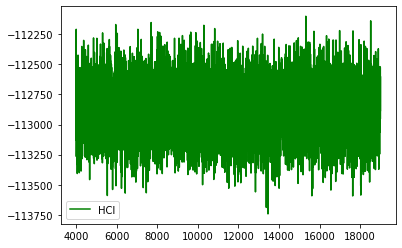

In [7]:
plt.plot(state1_df['Potential Energy (kJ/mole)'][4000:], color='g', label='HCl')
plt.legend()

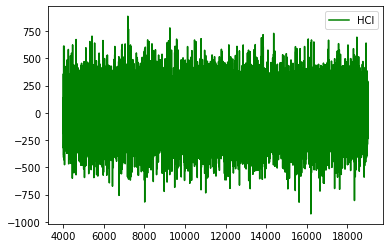

In [8]:
plt.plot(state1_df['Delta Potential Energy (kJ/mole)'][4000:], color='g', label='HCl')
plt.legend()

#### Sort by Delta Potential Energy

In [9]:
state1_df_sort_dE = state1_df[4000:].sort_values(by = ['Delta Potential Energy (kJ/mole)'])

In [10]:
state1_df_sort_dE= state1_df_sort_dE.reindex(columns = ['#"Step"','Potential Energy (kJ/mole)','Delta Potential Energy (kJ/mole)'])

In [11]:
state1_df_sort_dE['Frame'] = (state1_df_sort_dE['#"Step"'])//10000-400

In [12]:
state1_df_sort_dE.head(150)

,"#""Step""",Potential Energy (kJ/mole),Delta Potential Energy (kJ/mole),Frame
16202,16203000,-113277.987481,-926.703125,1220
15621,15622000,-113592.393731,-819.343750,1162
8013,8014000,-113368.331231,-817.765625,401
18349,18350000,-113175.159356,-803.984375,1435
6748,6749000,-113435.643731,-757.031250,274
...,...,...,...,...
17755,17756000,-113216.659356,-506.515625,1375
14540,14541000,-113161.518731,-506.000000,1054
15876,15877000,-113281.174981,-505.906250,1187
7178,7179000,-113343.643731,-504.468750,317


#### Sort by Potential Engergy

In [13]:
state1_df_sort_E = state1_df[4000:].sort_values(by = ['Potential Energy (kJ/mole)'])

In [14]:
state1_df_sort_E= state1_df_sort_E.reindex(columns = ['#"Step"','Potential Energy (kJ/mole)','Delta Potential Energy (kJ/mole)'])

In [15]:
state1_df_sort_E['Frame'] = (state1_df_sort_E['#"Step"'])//10000-400

In [16]:
state1_df_sort_E.head(150)

,"#""Step""",Potential Energy (kJ/mole),Delta Potential Energy (kJ/mole),Frame
13459,13460000,-113742.721856,-344.109375,946
13376,13377000,-113688.784356,-504.375000,937
17634,17635000,-113593.503106,-522.859375,1363
15621,15622000,-113592.393731,-819.343750,1162
5541,5542000,-113589.768731,-300.421875,154
...,...,...,...,...
8052,8053000,-113356.424981,-244.281250,405
7289,7290000,-113356.112481,-254.968750,329
12383,12384000,-113356.049981,-552.000000,838
11203,11204000,-113355.221856,-143.171875,720


#### Choose the rows with both low delta potential energy and potential energy

In [17]:
low_delta_E1 = state1_df_sort_dE[(state1_df_sort_dE['Delta Potential Energy (kJ/mole)'] <= -504.375000) & \
                              (state1_df_sort_dE['Potential Energy (kJ/mole)'] <= -113355.112481)]
low_delta_E_ls1 = low_delta_E1['Frame'].tolist()

In [18]:
len(low_delta_E_ls1)

25

In [19]:
low_delta_E1

,"#""Step""",Potential Energy (kJ/mole),Delta Potential Energy (kJ/mole),Frame
15621,15622000,-113592.393731,-819.343750,1162
8013,8014000,-113368.331231,-817.765625,401
6748,6749000,-113435.643731,-757.031250,274
10788,10789000,-113456.565606,-705.890625,678
17617,17618000,-113367.612481,-701.468750,1361
17370,17371000,-113371.096856,-694.140625,1337
6424,6425000,-113569.674981,-672.687500,242
6269,6270000,-113432.315606,-642.140625,227
7305,7306000,-113461.237481,-616.437500,330
9603,9604000,-113373.737481,-609.359375,560


### MDAnalysis.lib.distances.calc_dihedrals

In [20]:
# https://docs.mdanalysis.org/2.0.0/documentation_pages/lib/distances.html#MDAnalysis.lib.distances.calc_dihedrals

In [21]:
mol1 = u1.select_atoms('byres element C')

In [22]:
visualize(mol1)

NGLWidget(max_frame=1499)

In [23]:
def get_dihedral(u, atom1, atom2, atom3, atom4):
    dihe_ls = []
    for ts in u.trajectory:
        dihedral = distances.calc_dihedrals(u.atoms[atom1].position,\
                                           u.atoms[atom2].position,\
                                           u.atoms[atom3].position,\
                                           u.atoms[atom4].position) * 180/ np.pi
        dihe_ls.append(dihedral)
    dihe_df = pd.DataFrame(dihe_ls, columns =['Dihedral'])
    dihe_df['Frame'] = np.arange(len(u1.trajectory))+1
    return dihe_df

### C=C-C=N

In [24]:
visualize(u1.atoms[3184]+u1.atoms[3187]+u1.atoms[3188]+u1.atoms[3190])

NGLWidget(max_frame=1499)

In [25]:
dihedral1_1 = get_dihedral(u1, 3184, 3187, 3188, 3190)

In [26]:
dihedral_stable1_1 = dihedral1_1[dihedral1_1['Frame'].isin(low_delta_E_ls1)]

(-180.0, 180.0)

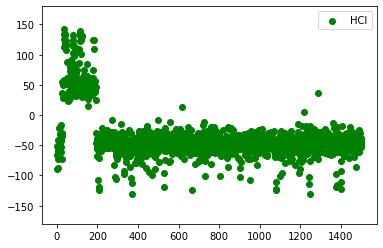

In [27]:
plt.scatter(dihedral1_1['Frame'], dihedral1_1['Dihedral'], linewidths=1, marker='o', color='g', label='HCl')
plt.legend()
plt.ylim(-180,180)

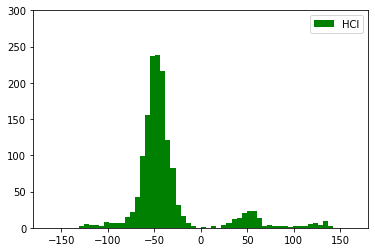

In [28]:
y1_1,x1_1,_ = plt.hist(dihedral1_1['Dihedral'], bins=50, color='green', label='HCl')
plt.xlim(-180,180)
plt.ylim(0,300)
plt.legend()

In [29]:
x1_1[np.where(y1_1 == y1_1.max())]

array([-49.0055841])

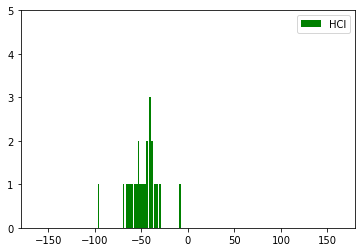

In [30]:
# plot histgram for low dE & low E
y1_1,x1_1,_ = plt.hist(dihedral_stable1_1['Dihedral'], bins=50, color='green', label='HCl')
plt.xlim(-180,180)
plt.ylim(0,5)
plt.legend()
plt.show()